<br><font color='darkviolet' size=8><u>K-Means Clustering From Scratch</u></font>

In [1]:
# importing libraries to perform EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_blobs
from collections import defaultdict
warnings.filterwarnings('ignore')

In [2]:
# creating the dataframe using sklearn make_blobs dataset
data=make_blobs(n_samples=100000,n_features=2,centers=5)

# note the above data is a tuple of array

# the first array is a 2d feature array which we're capturing in the following dataframe
print(data[0])
print('\n')

# the next array is an array of labels which we'll use later to compare our clusters with the actuals
print(data[1])

df=pd.DataFrame(data[0],columns=['x','y'])
df

[[ 1.26010942 -5.61744242]
 [ 5.18753515  3.54829278]
 [ 7.29153706 -5.44863518]
 ...
 [ 5.21117715  4.81972095]
 [-0.64858063 -2.25592624]
 [ 1.55883949 -6.12866027]]


[4 2 0 ... 2 3 4]


,x,y
0,1.260109,-5.617442
1,5.187535,3.548293
2,7.291537,-5.448635
3,2.881551,3.590741
4,-2.665963,-0.440156
...,...,...
99995,-3.137898,-1.752370
99996,-1.383545,-3.994978
99997,5.211177,4.819721
99998,-0.648581,-2.255926


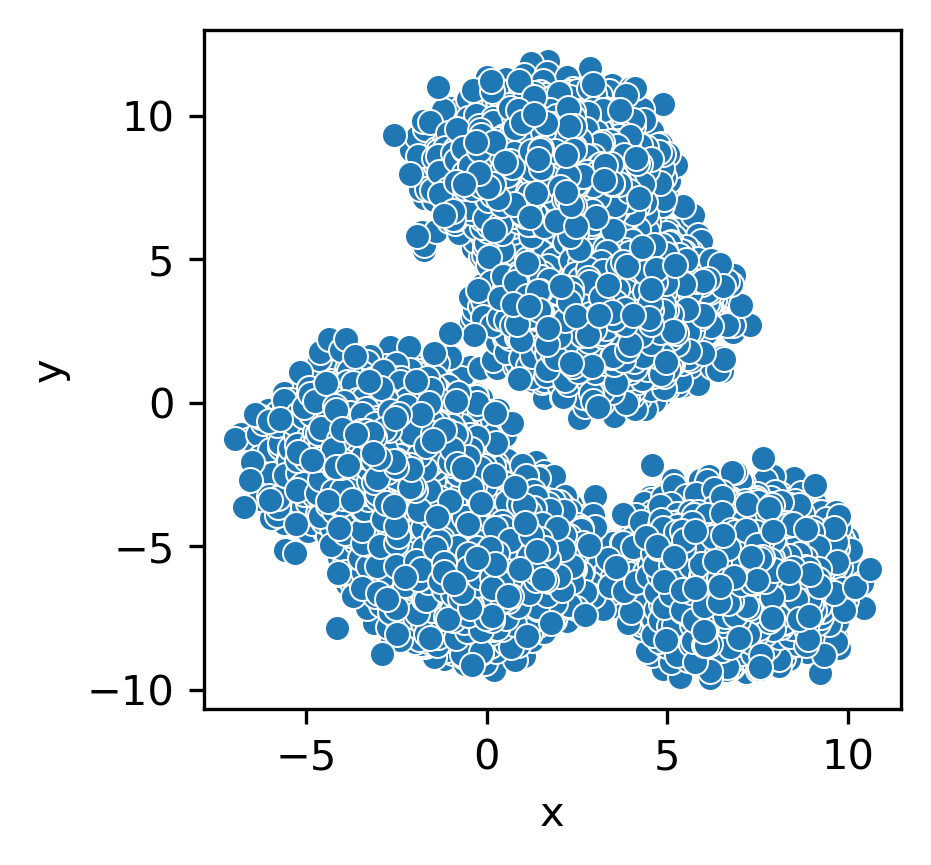

In [3]:
# visualizing the above dataframe
plt.figure(dpi=300, figsize=(3,3))
sns.scatterplot(df.x,df.y);

<b>Here we're creating a <font color='darkviolet'>Euclidean distance metric</font> which is required to <font color='darkviolet'>assign</font> an appropriate <font color='darkviolet'>cluster</font> for each of the <font color='darkviolet'>data points</font>

In [4]:
def dist(pt1,pt2):
    if type(pt1)!=type(np.array([1])) or type(pt2)!=type(np.array([1])):
        pt1,pt2=np.array(pt1),np.array(pt2)
    return np.sqrt(((pt1-pt2)**2).sum())

# <font color='darkviolet'>K-Means Clustering Algorithm</font>
Here we are writing the main algorithm to cluster the given datapoints

In [5]:
def kmeans(k,data,itr,thres):
    
    # choosing k rabdom datapoints to initialize the means
    means=data.sample(k).values
    count=0
    compare=[]
    
    # outer while loop to control the no of iterations using count
    while count<itr:
        count+=1
        
        # initializing hash table to assign the cluster to each data point
        mean_dict=defaultdict(list)
        for point in data.values:
            tmp=None
            mindist=float('inf')
            
            for mean in means:
                # finding the distance between the point under consideration 
                # and the centroids of previously formed clusters
                d=dist(mean,point)
                
                if d<mindist:
                    # capturing the closest centroid for the given point 
                    mindist=d
                    tmp=mean
                    
            # assiging the datapoint to the closest cluster
            mean_dict[str(tmp)].append(list(point))
        
        means=[]
        for mean in mean_dict:
            # optimizing the centroids by taking the mean of all the points in a particular cluster as its new centroid
            means.append(list(np.array(mean_dict[mean]).mean(axis=0)))
        compare.append(np.array(means))
        
        # checking for convergence of centroid for early stopping
        if len(compare)>1 and dist(compare[-1],compare[-2])<thres:
            print(count)
            return means
    return means

In [6]:
mu=kmeans(5,df,1000,10**-4)
mu

10


[[-0.4139379213397544, -5.524113478148579],
 [3.194434793180566, 3.3039470246090565],
 [6.810069000558317, -5.933287359196944],
 [-2.9738115559133838, -1.8207458580898168],
 [1.6642685224326228, 7.985026940786052]]

<b>Here we're creating a function called <font color='green'>coloring</font> which <font color='green'>assigns unique integer values</font> for each <font color='green'>datapoint</font> based on the <font color='green'>cluster</font> it is belonging to. We're going to use <font color='darkgreen'>.apply()</font> method and finally use <font color='darkgreen'>scatterplot</font> to visualize the clusters.

In [7]:
def coloring(point1,point2):
    mindist=float('inf')
    ans=None
    point=[point1,point2]
    for i,pt in enumerate(mu):
        if dist(pt,point)<mindist:
            mindist=dist(pt,point)
            ans=i
    return ans
# vectorizing the above function

In [8]:
# derived column called color
df['color']=df.apply(lambda df: coloring(df.x,df.y),axis=1)

In [9]:
mu=np.array(mu)

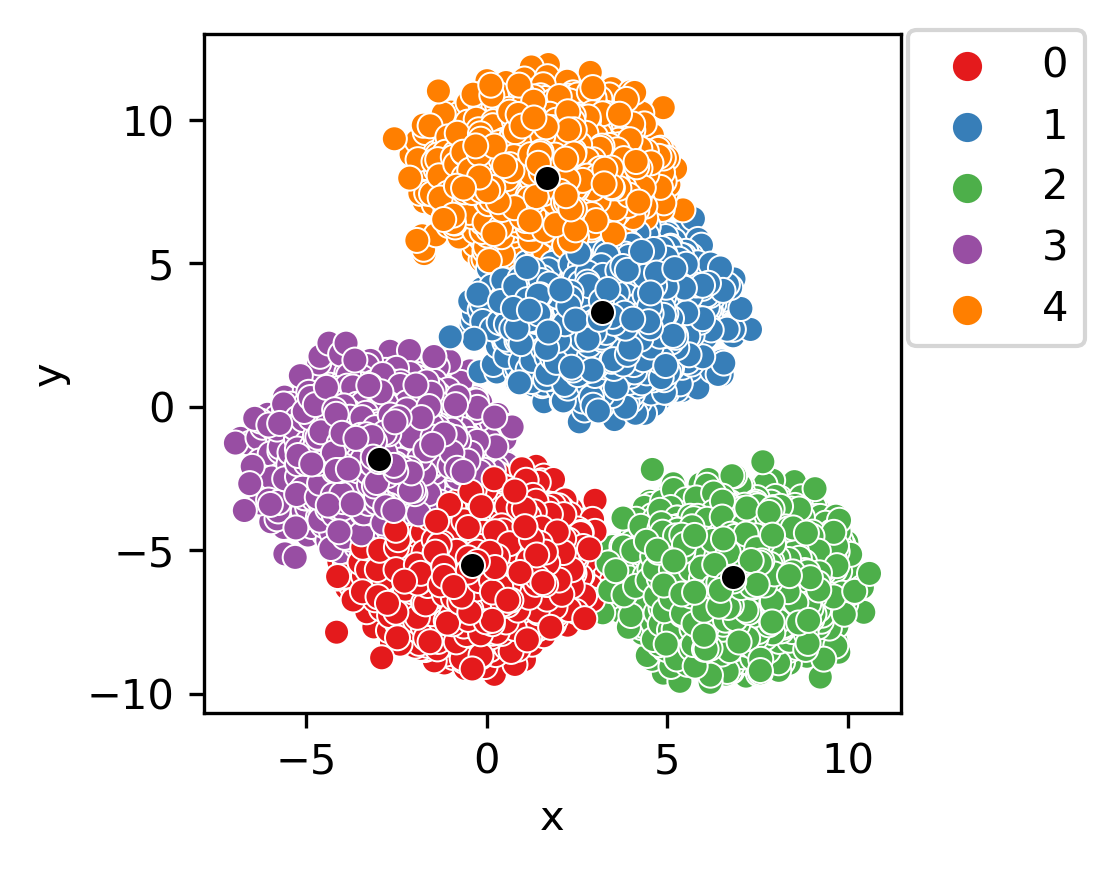

In [10]:
# visualizing the given dataset based on the clusters that we created using k-means clustering algorithm
plt.figure(dpi=300, figsize=(3,3))
sns.scatterplot(x=df.x,y=df.y,hue=df.color,palette='Set1')
sns.scatterplot(mu[:,0],mu[:,1],color='Black')
plt.legend(loc=(1.01,0.54));

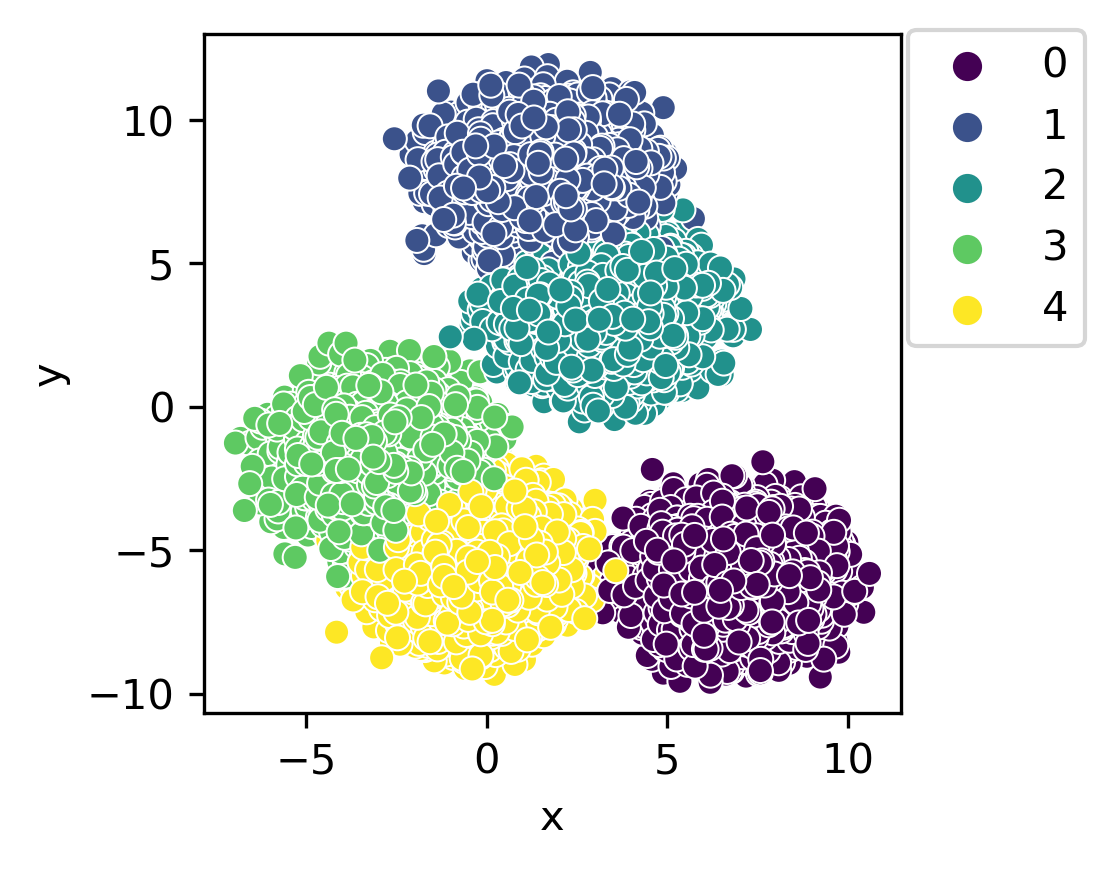

In [11]:
# visualizing the original dataset using the actual clustering as given by the make_blobs
plt.figure(dpi=300, figsize=(3,3))
sns.scatterplot(df.x,df.y, hue=data[1], palette='viridis')
plt.legend(loc=(1.01,0.54));